# **Caso Práctico: Predicción de Necesidades de Capacitación**

# **Introducción**

## Objetivo
Este notebook tiene como objetivo desarrollar un modelo predictivo para identificar necesidades de capacitación dentro de una organización,
tomando como base las competencias actuales de los empleados, su rendimiento y sus metas futuras.
Este análisis ayudará a los tomadores de decisiones a diseñar planes de formación específicos que potencien las habilidades y capacidades
de los empleados, promoviendo el desarrollo organizacional y personal.

## Contexto del Dataset
Para llevar a cabo este análisis, utilizaremos un dataset sintético que simula información relevante sobre los empleados.
A continuación, se detallan las variables incluidas en el dataset:

- **ID_Empleado**: Identificador único para cada empleado.
- **Competencias_Actuales**: Nivel actual de competencias del empleado (Principiante, Intermedio, Avanzado).
- **Rol_Laboral**: Cargo del empleado dentro de la organización (Desarrollador, Gerente, etc.).
- **Puntuacion_Desempeno**: Puntuación del rendimiento del empleado en una escala de 0 a 100.
- **Horas_Capacitacion_Ultimo_Ano**: Cantidad de horas de capacitación que el empleado realizó en el último año.
- **Antiguedad_Empresa**: Número de años que el empleado lleva trabajando en la empresa.
- **Habilidades_Requeridas**: Habilidad principal requerida para el cargo del empleado (Liderazgo, Comunicación, etc.).
- **Objetivos_Futuros**: Metas profesionales que el empleado desea alcanzar (Rol de Liderazgo, Expertise Técnico, etc.).

Este dataset será la base para entrenar y evaluar los modelos predictivos que nos permitirán identificar las necesidades de capacitación de los empleados.


## **Importación de Librerías**

Antes de comenzar con el análisis, es necesario importar las librerías que utilizaremos a lo largo del desarrollo. Estas incluyen herramientas
para manejo de datos, visualización, y desarrollo del modelo predictivo.

In [ ]:
# Importación de librerías principales
import pandas as pd  # Para manipulación de datos
import numpy as np  # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para visualización de gráficos
import seaborn as sns  # Para gráficos avanzados y análisis exploratorio
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Para transformación de variables
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Carga y Exploración de Datos**

## Carga de Datos
Comenzamos cargando el dataset en un DataFrame utilizando la librería `pandas`. Esto nos permitirá explorar su contenido y estructura. El dataset contiene información sobre empleados, sus competencias, roles y objetivos futuros.


In [ ]:
# Carga del dataset
datos = pd.read_csv('Prediccion_Necesidades_Formacion.csv')

In [ ]:
# Visualización de las primeras filas del dataset
datos.head()

,ID_Empleado,Competencias_Actuales,Rol_Laboral,Puntuacion_Desempeno,Horas_Capacitacion_Ultimo_Ano,Antiguedad_Empresa,Habilidades_Requeridas,Objetivos_Futuros
0,1,Intermedio,Gerente,72.487795,65,6,Comunicación,Habilidades Transversales
1,2,Avanzado,Gerente,72.919142,43,3,Liderazgo,Dominio de Ventas
2,3,Intermedio,Analista,63.344441,3,19,Trabajo en Equipo,Rol de Liderazgo
3,4,Intermedio,Representante de Ventas,65.335701,63,8,Trabajo en Equipo,Habilidades Transversales
4,5,Intermedio,Desarrollador,64.469086,4,2,Resolución de Problemas,Habilidades Transversales


## Análisis Descriptivo
El análisis descriptivo es crucial para entender el comportamiento general de los datos. A continuación, exploramos estadísticas básicas, verificamos la presencia de valores nulos y analizamos posibles outliers.


In [ ]:
# Resumen estadístico
print("Resumen estadístico del dataset:")
datos.describe()

Resumen estadístico del dataset:


,ID_Empleado,Puntuacion_Desempeno,Horas_Capacitacion_Ultimo_Ano,Antiguedad_Empresa
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,74.975426,39.027600,10.126600
std,1443.520003,9.870465,23.125808,5.551895
min,1.000000,38.630039,0.000000,1.000000
25%,1250.750000,68.255820,19.000000,5.000000
50%,2500.500000,75.023813,38.500000,10.000000
75%,3750.250000,81.616544,59.000000,15.000000
max,5000.000000,100.000000,79.000000,19.000000


In [ ]:
# Verificación de valores nulos
print("Valores nulos por columna:")
print(datos.isnull().sum())

Valores nulos por columna:
ID_Empleado                      0
Competencias_Actuales            0
Rol_Laboral                      0
Puntuacion_Desempeno             0
Horas_Capacitacion_Ultimo_Ano    0
Antiguedad_Empresa               0
Habilidades_Requeridas           0
Objetivos_Futuros                0
dtype: int64


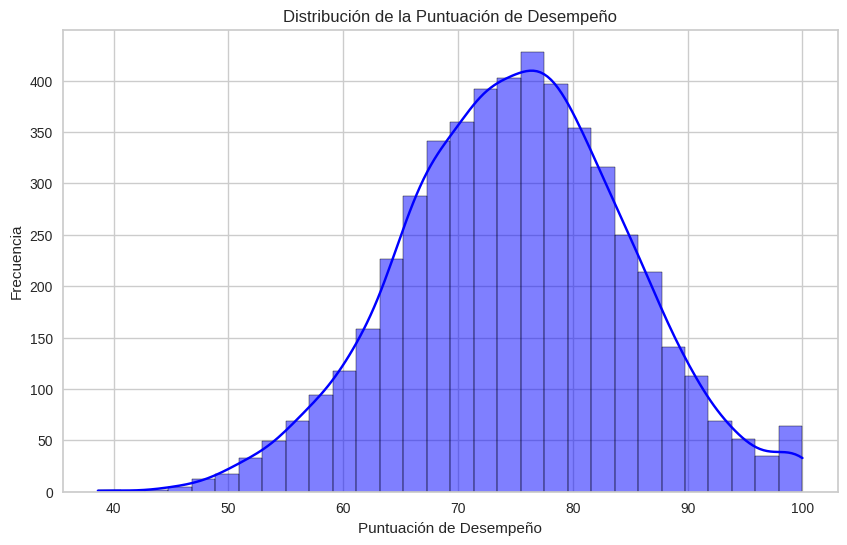

In [ ]:
# Análisis visual de la distribución de puntajes de desempeño
plt.figure(figsize=(10, 6))
sns.histplot(datos['Puntuacion_Desempeno'], kde=True, bins=30, color='blue')
plt.title("Distribución de la Puntuación de Desempeño")
plt.xlabel("Puntuación de Desempeño")
plt.ylabel("Frecuencia")
plt.show()

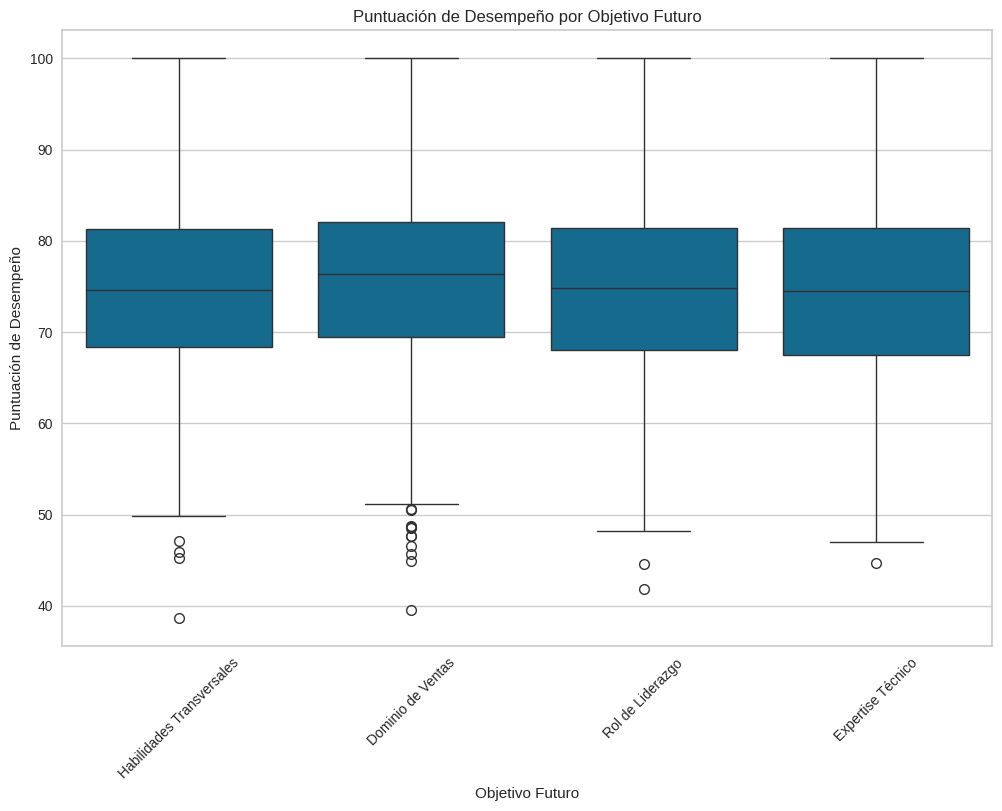

In [ ]:
# Boxplot para analizar la variación de la puntuación de desempeño según el objetivo futuro
plt.figure(figsize=(12, 8))
sns.boxplot(x=datos['Objetivos_Futuros'], y=datos['Puntuacion_Desempeno'])
plt.title("Puntuación de Desempeño por Objetivo Futuro")
plt.xlabel("Objetivo Futuro")
plt.ylabel("Puntuación de Desempeño")
plt.xticks(rotation=45)
plt.show()

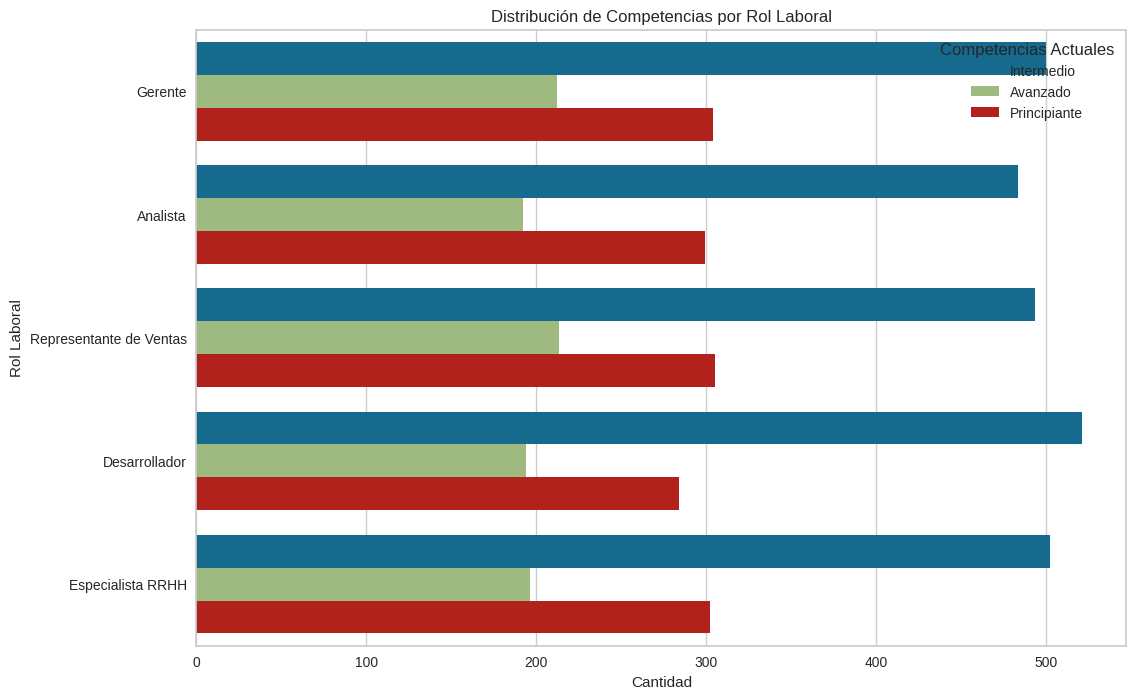

In [ ]:
# Análisis de la relación entre el rol laboral y las competencias actuales
plt.figure(figsize=(12, 8))
sns.countplot(y=datos['Rol_Laboral'], hue=datos['Competencias_Actuales'])
plt.title("Distribución de Competencias por Rol Laboral")
plt.xlabel("Cantidad")
plt.ylabel("Rol Laboral")
plt.legend(title="Competencias Actuales")
plt.show()

# **Preparación de los Datos**

## Limpieza de Datos
En esta etapa, realizaremos la limpieza del dataset para asegurar que los datos estén en un estado óptimo para el análisis.


In [ ]:
# Eliminar duplicados si existen
datos = datos.drop_duplicates()
print(f"Cantidad de registros después de eliminar duplicados: {len(datos)}")

Cantidad de registros después de eliminar duplicados: 5000


In [ ]:
# Verificación de valores nulos
print("Valores nulos después de la limpieza:")
print(datos.isnull().sum())

Valores nulos después de la limpieza:
ID_Empleado                      0
Competencias_Actuales            0
Rol_Laboral                      0
Puntuacion_Desempeno             0
Horas_Capacitacion_Ultimo_Ano    0
Antiguedad_Empresa               0
Habilidades_Requeridas           0
Objetivos_Futuros                0
dtype: int64


## Transformación de Variables



## Codificación One-Hot de Variables Categóricas

Para preparar los datos categóricos para el análisis, utilizamos **One-Hot Encoding**, una técnica que convierte las variables categóricas en variables binarias. Esto asegura que las variables puedan ser interpretadas correctamente por los algoritmos de machine learning.

### Descripción:
- **Variables categóricas** seleccionadas:
  - `Competencias_Actuales`
  - `Rol_Laboral`
  - `Habilidades_Requeridas`
  - `Objetivos_Futuros`
- La codificación crea una nueva columna para cada categoría única de las variables seleccionadas. Para evitar multicolinealidad, eliminamos la primera categoría de cada variable (`drop='first'`).


In [ ]:
# Codificación One-Hot de variables categóricas
columnas_categoricas = ['Competencias_Actuales', 'Rol_Laboral', 'Habilidades_Requeridas', 'Objetivos_Futuros']
encoder = OneHotEncoder( drop='first', sparse_output=False)
categoricas_codificadas = encoder.fit_transform(datos[columnas_categoricas])
categoricas_codificadas = pd.DataFrame(categoricas_codificadas, columns=encoder.get_feature_names_out(columnas_categoricas))

## Normalización de Variables Numéricas

Para asegurar que las variables numéricas tengan escalas comparables y evitar que los algoritmos de machine learning sean sesgados por la magnitud de los datos, aplicamos **normalización**. La normalización transforma los datos numéricos a una distribución con media 0 y desviación estándar 1.

### Descripción:
- **Variables numéricas** seleccionadas para normalización:
  - `Puntuacion_Desempeno`
  - `Horas_Capacitacion_Ultimo_Ano`
  - `Antiguedad_Empresa`
- La técnica utilizada es **Estandarización (StandardScaler)**, que transforma cada valor usando la fórmula:

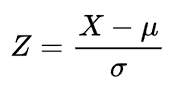

  donde:
  - X es el valor original.
  - μ es la media de la columna.
  - σ es la desviación estándar de la columna.

In [ ]:
# Normalización de variables numéricas
columnas_numericas = ['Puntuacion_Desempeno', 'Horas_Capacitacion_Ultimo_Ano', 'Antiguedad_Empresa']
scaler = StandardScaler()
numericas_normalizadas = scaler.fit_transform(datos[columnas_numericas])
numericas_normalizadas = pd.DataFrame(numericas_normalizadas, columns=columnas_numericas)

In [ ]:
# Concatenación de datos transformados
datos_clustering = pd.concat([categoricas_codificadas, numericas_normalizadas], axis=1)
print(f"Tamaño del dataset preparado para clustering: {datos_clustering.shape}")

Tamaño del dataset preparado para clustering: (5000, 16)


# **Selección del Modelo**

## Método del Codo
Para determinar el número óptimo de clusters, utilizamos el método del codo. Este método mide la inercia (suma de las distancias cuadradas dentro de los clusters) para diferentes valores de `k`. Observamos la gráfica de inercia para identificar el punto donde esta comienza a disminuir de manera menos pronunciada ("el codo").


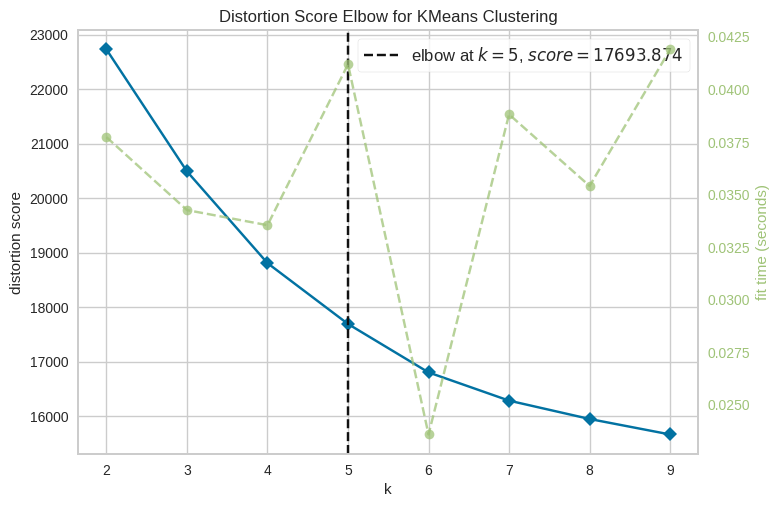

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

modelo = KMeans(random_state=1)
visual = KElbowVisualizer(modelo, k=(2,10))

visual.fit(datos_clustering)
visual.show()
plt.show()

# **Implementación del Modelo**

## Entrenamiento del Modelo
Basándonos en el número de clusters óptimo identificado previamente, configuramos el modelo K-Means y entrenamos con el conjunto de datos preparado.


In [ ]:
# Número óptimo de clusters
num_clusters = 5

# Configuración y entrenamiento del modelo K-Means
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(datos_clustering)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# Asignación de clusters al dataset
clusters = kmeans_model.predict(datos_clustering)
datos_kmeans = datos.copy()
datos_kmeans['Cluster'] = clusters

In [ ]:
datos_kmeans.head(10)

,ID_Empleado,Competencias_Actuales,Rol_Laboral,Puntuacion_Desempeno,Horas_Capacitacion_Ultimo_Ano,Antiguedad_Empresa,Habilidades_Requeridas,Objetivos_Futuros,Cluster
0,1,Intermedio,Gerente,72.487795,65,6,Comunicación,Habilidades Transversales,4
1,2,Avanzado,Gerente,72.919142,43,3,Liderazgo,Dominio de Ventas,4
2,3,Intermedio,Analista,63.344441,3,19,Trabajo en Equipo,Rol de Liderazgo,0
3,4,Intermedio,Representante de Ventas,65.335701,63,8,Trabajo en Equipo,Habilidades Transversales,4
4,5,Intermedio,Desarrollador,64.469086,4,2,Resolución de Problemas,Habilidades Transversales,2
5,6,Intermedio,Representante de Ventas,51.167885,47,19,Técnico,Habilidades Transversales,0
6,7,Avanzado,Gerente,78.419831,65,15,Comunicación,Habilidades Transversales,3
7,8,Avanzado,Analista,64.821936,26,14,Comunicación,Expertise Técnico,0
8,9,Intermedio,Analista,70.871559,23,14,Resolución de Problemas,Expertise Técnico,0
9,10,Intermedio,Analista,71.981428,55,4,Trabajo en Equipo,Dominio de Ventas,4


## **Evaluación del Modelo**


El tamaño de cada clúster es una métrica clave para entender cómo se distribuyen los datos después del proceso de agrupamiento. Un clúster grande indica que agrupa una proporción significativa de los datos, mientras que un clúster pequeño puede señalar un grupo más específico o menos representativo.


In [ ]:
cluster_sizes = datos_kmeans['Cluster'].value_counts()
print("Tamaño de los Clústeres:")
print(cluster_sizes)

Tamaño de los Clústeres:
Cluster
3    1065
4    1027
2    1025
0     976
1     907
Name: count, dtype: int64


Calcular los promedios de las variables numéricas por clúster permite interpretar las diferencias principales entre los grupos identificados por el modelo K-Means. Esto facilita la identificación de patrones clave dentro de cada clúster.


In [ ]:
cluster_summary = datos_kmeans.groupby('Cluster')[columnas_numericas].mean()
print("Promedios de Variables Numéricas por Clúster")
cluster_summary

Promedios de Variables Numéricas por Clúster:


,Puntuacion_Desempeno,Horas_Capacitacion_Ultimo_Ano,Antiguedad_Empresa
Cluster,,,
0,68.148976,21.033811,14.539959
1,87.494283,31.315325,12.233738
2,73.696490,18.456585,4.685854
3,73.349670,61.833803,14.756808
4,73.369147,59.819864,4.700097


El análisis de la distribución de variables categóricas dentro de cada clúster permite identificar patrones específicos en las características no numéricas. Esto ayuda a comprender mejor la composición de los clústeres en términos de variables como roles laborales, habilidades requeridas u objetivos futuros.


In [ ]:
for col in columnas_categoricas:
    print(f"\nDistribución de {col} por Clúster:")
    print(datos_kmeans.groupby('Cluster')[col].value_counts())


Distribución de Competencias_Actuales por Clúster:
Cluster  Competencias_Actuales
0        Intermedio               463
         Principiante             315
         Avanzado                 198
1        Intermedio               453
         Principiante             272
         Avanzado                 182
2        Intermedio               522
         Principiante             305
         Avanzado                 198
3        Intermedio               537
         Principiante             309
         Avanzado                 219
4        Intermedio               524
         Principiante             293
         Avanzado                 210
Name: count, dtype: int64

Distribución de Rol_Laboral por Clúster:
Cluster  Rol_Laboral            
0        Analista                   226
         Especialista RRHH          193
         Gerente                    191
         Desarrollador              189
         Representante de Ventas    177
1        Representante de Ventas    200
      

# **Resultados y Visualización**

El **heatmap** es una herramienta visual poderosa para interpretar los promedios de las variables numéricas dentro de cada clúster. Este gráfico utiliza una escala de colores para representar valores numéricos, facilitando la comparación de las características entre clústeres.


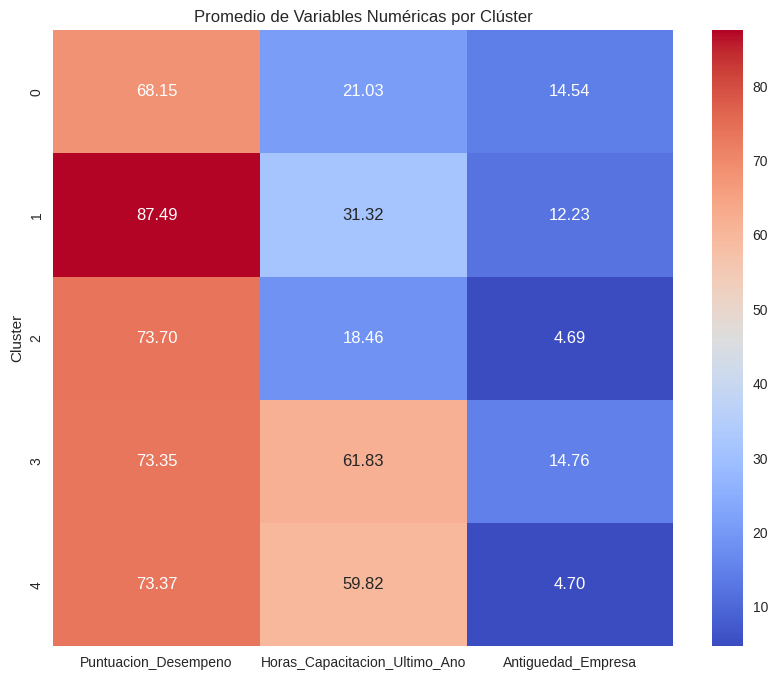

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Promedio de Variables Numéricas por Clúster')
plt.show()

El **índice de silueta** es una métrica que evalúa la calidad del agrupamiento al medir qué tan bien se agrupan los puntos dentro de sus respectivos clústeres y qué tan distintos son de otros clústeres. Utilizando **Yellowbrick**, podemos visualizar esta métrica para cada clúster.


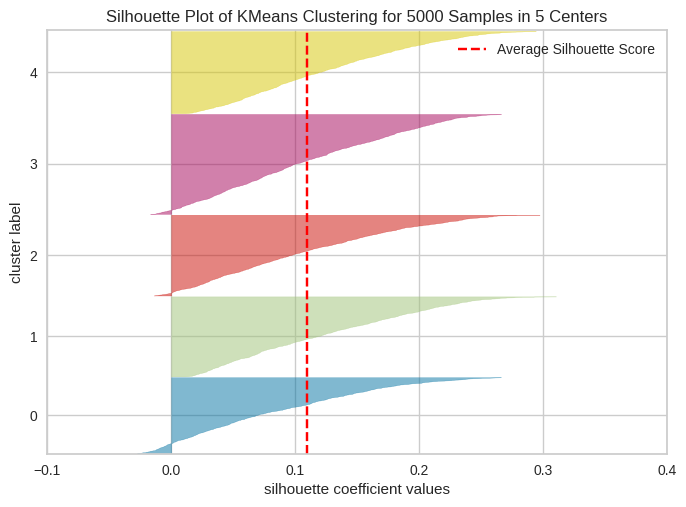

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(datos_clustering)
visualizer.show()
plt.show()

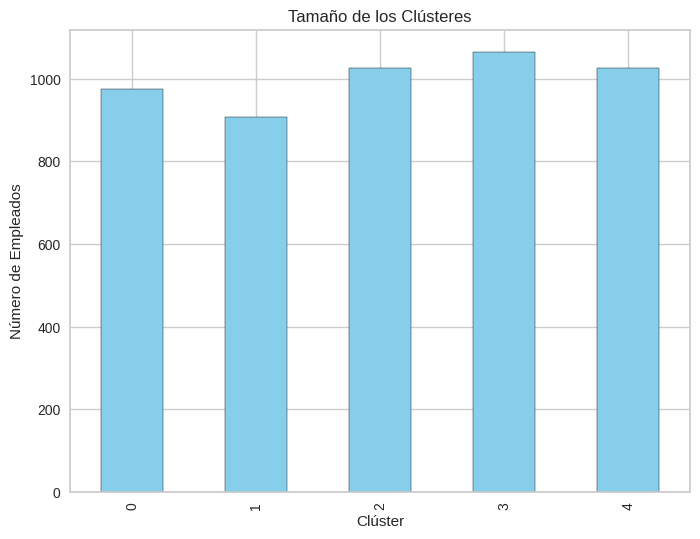

In [ ]:
plt.figure(figsize=(8, 6))
cluster_sizes.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Tamaño de los Clústeres')
plt.xlabel('Clúster')
plt.ylabel('Número de Empleados')
plt.show()

El gráfico de dispersión permite visualizar la relación entre **Puntuación de Desempeño** y **Horas de Capacitación**, con los puntos coloreados según el clúster al que pertenecen. Esto facilita la interpretación de las características de cada grupo.


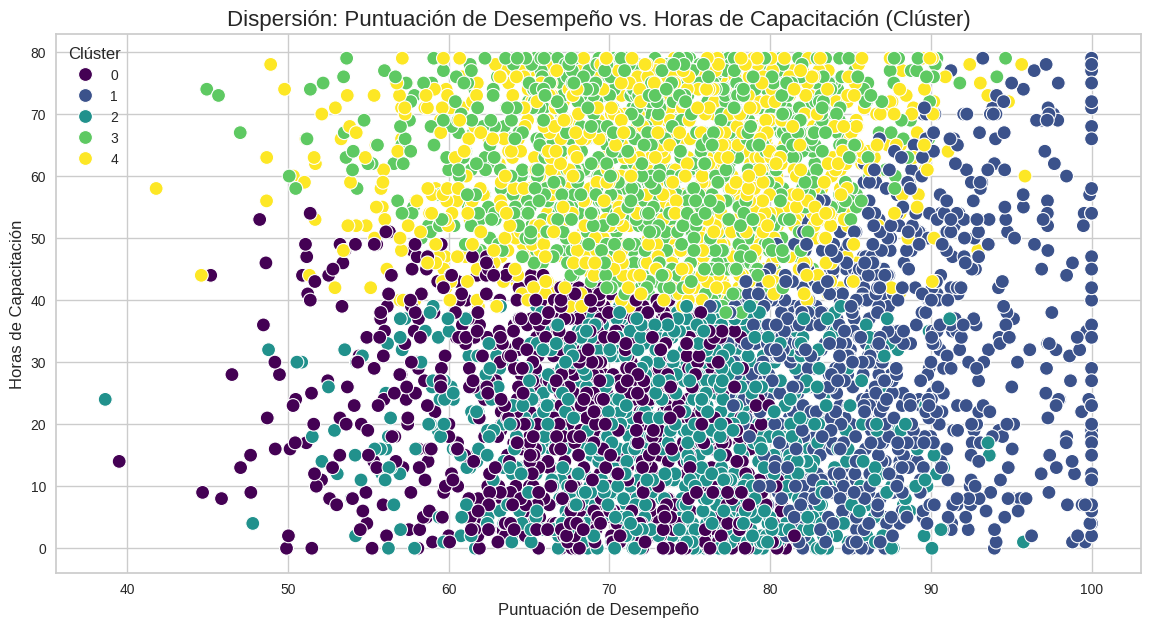

In [ ]:
# Dispersión de Puntuación de Desempeño vs. Horas de Capacitación por Clúster
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=datos_kmeans,
    x='Puntuacion_Desempeno',
    y='Horas_Capacitacion_Ultimo_Ano',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title('Dispersión: Puntuación de Desempeño vs. Horas de Capacitación (Clúster)', fontsize=16)
plt.xlabel('Puntuación de Desempeño', fontsize=12)
plt.ylabel('Horas de Capacitación', fontsize=12)
plt.legend(title='Clúster', fontsize=10)
plt.grid(True)
plt.show()

El **Análisis de Componentes Principales (PCA)** se utiliza para reducir la dimensionalidad de los datos a 2 dimensiones, lo que permite visualizar los clústeres identificados por el modelo K-Means en un gráfico de dispersión. Esto es particularmente útil cuando los datos originales tienen muchas características.

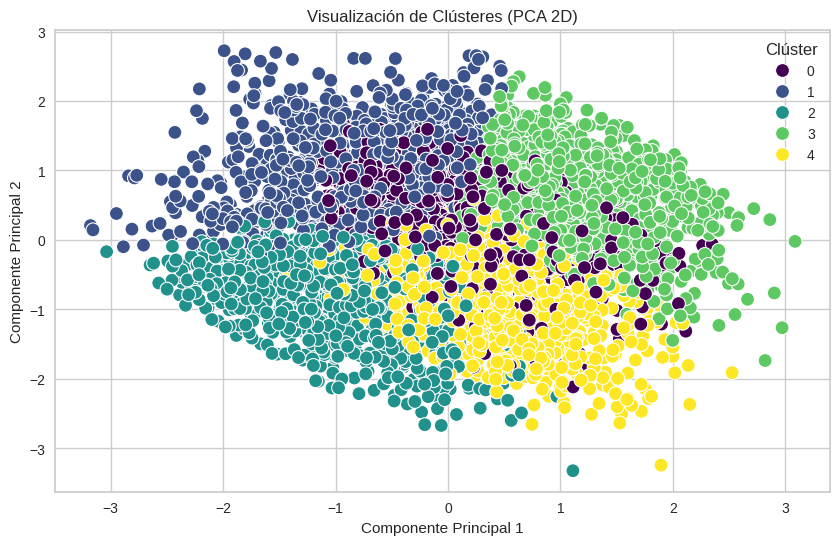

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(datos_clustering)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Visualización de Clústeres (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()


## **Clustering jerárquico**

Un dendograma es una representación gráfica de los resultados de un análisis de agrupamiento jerárquico (clustering). Muestra cómo se organizan las muestras en grupos o clústeres a diferentes niveles de similitud. En el dendograma, las muestras que están más cerca unas de otras están en ramas más cercanas, mientras que las muestras menos similares están separadas en ramas más lejanas.

Aquí tienes una breve guía sobre los conceptos clave y cómo interpretar un dendograma, junto con recursos para trabajar con él en Python, utilizando bibliotecas comunes como scipy y matplotlib:

**1. Conceptos Básicos del Dendograma**

Agrupamiento Jerárquico: Este es el proceso de construir una jerarquía de clústeres. Existen dos enfoques principales:

* Aglomerativo (de abajo hacia arriba): Comienza tratando cada muestra como su propio clúster y luego fusiona los clústeres más cercanos en cada paso.
* Divisivo (de arriba hacia abajo): Comienza con todas las muestras en un solo clúster y divide iterativamente en clústeres más pequeños.

**Distancia y Similitud:** La medida de distancia (como la distancia euclidiana o la distancia de Manhattan) se utiliza para determinar qué tan cerca están las muestras unas de otras.

**Métodos de Enlace:** Hay varias formas de calcular la distancia entre clústeres cuando se construye el dendograma:

* Enlace simple: Usa la distancia mínima entre puntos de dos clústeres.
* Enlace completo: Usa la distancia máxima.
* Enlace promedio: Usa la distancia promedio.
* Enlace de Ward: Minimiza la varianza dentro de cada clúster.

**2. Interpretación del Dendograma**

* Altura: En el eje vertical, la altura donde dos ramas se unen representa la distancia o disimilitud entre los clústeres. Cuanto más alta es la unión, menos similares son los clústeres.

* Corte del Dendograma: Un punto de corte horizontal en el dendograma divide el árbol en clústeres. Los clústeres por encima de la línea de corte permanecen agrupados, mientras que los por debajo están separados. El nivel de corte determina la cantidad de clústeres finales.

### **Dendrograma**


Los resultados del hierarchical clustering pueden representarse como un árbol en el que las ramas representan la jerarquía con la que se van sucediendo las uniones de clusters.

Supóngase que se dispone de 45 observaciones en un espacio de dos dimensiones, a los que se les aplica hierarchical clustering para intentar identificar grupos. El siguiente dendrograma representa los resultados obtenidos.
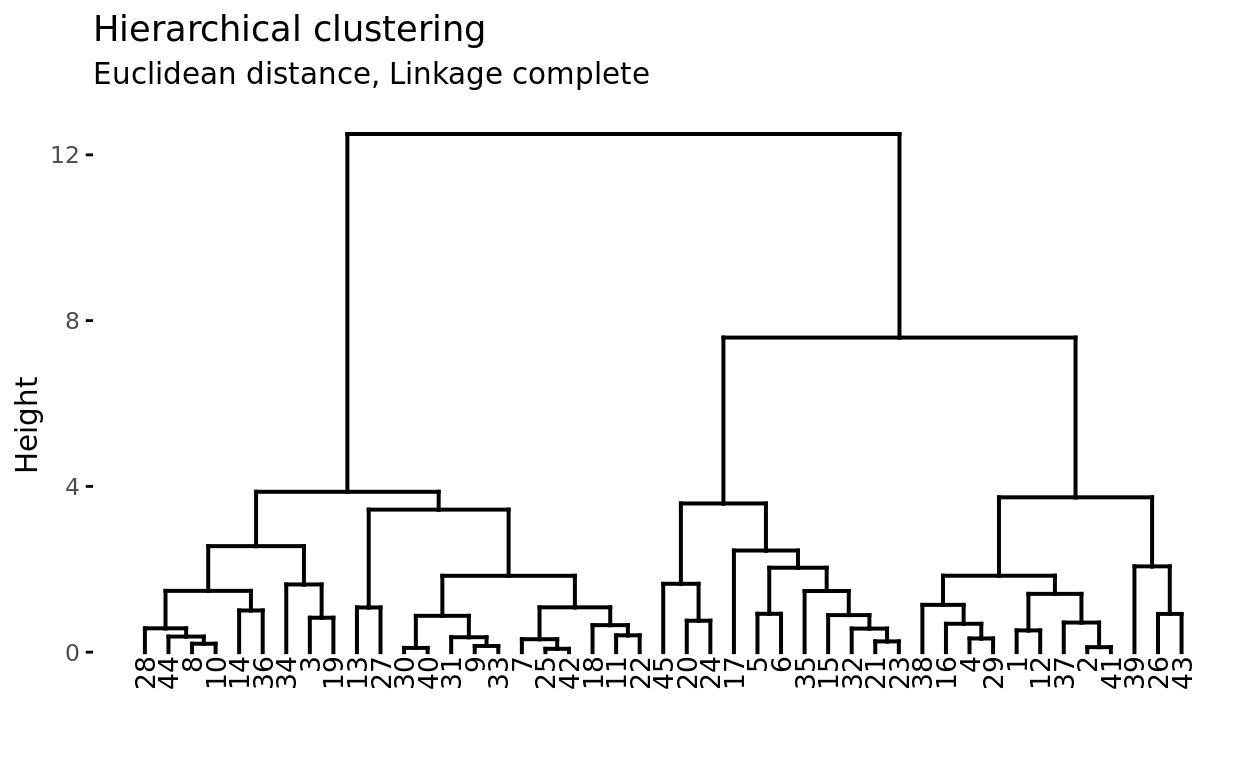


En la base del dendrograma, cada observación forma una terminación individual conocida como hoja o leaf del árbol. A medida que se asciende por la estructura, pares de hojas se fusionan formando las primeras ramas. Estas uniones se corresponden con los pares de observaciones más similares. También ocurre que las ramas se fusionan con otras ramas o con hojas. Cuanto más temprana (más próxima a la base del dendrograma) ocurre una fusión, mayor es la similitud.

Para cualquier par de observaciones, se puede identificar el punto del árbol en el que las ramas que contienen dichas observaciones se fusionan. La altura a la que esto ocurre (eje vertical) indica cómo de similares/diferentes son las dos observaciones. Los dendrogramas, por lo tanto, se deben interpretar únicamente en base al eje vertical y no por las posiciones que ocupan las observaciones en el eje horizontal, esto último es simplemente por estética y puede variar de un programa a otro.

Por ejemplo, la observación 8 es la más similar a la 10 ya que es la primera fusión que recibe la observación 10 (y viceversa). Podría resultar tentador decir que la observación 14, situada inmediatamente a la derecha de la 10, es la siguiente más similar, sin embargo, las observaciones 28 y 44 son más similares a la 10 a pesar de que se encuentran más alejadas en el eje horizontal. Del mismo modo, no es correcto decir que la observación 14 es más similar a la observación 10 de lo que lo es la 36 por el hecho de que está más próxima en el eje horizontal. Prestando atención a la altura en que las respectivas ramas se unen, la única conclusión válida es que la similitud entre los pares 10-14 y 10-36 es la misma.


### **Cortar el dendograma para generar los clusters**


Además de representar en un dendrograma la similitud entre observaciones, se tiene que identificar el número de clusters creados y qué observaciones forman parte de cada uno. Si se realiza un corte horizontal a una determinada altura del dendrograma, el número de ramas que sobrepasan (en sentido ascendente) dicho corte se corresponde con el número de clusters. La siguiente imagen muestra dos veces el mismo dendrograma. Si se realiza el corte a la altura de 5, se obtienen dos clusters, mientras que si se hace a la de 3.5 se obtienen 4. La altura de corte tiene por lo tanto la misma función que el valor K en K-means-clustering: controla el número de clusters obtenidos.

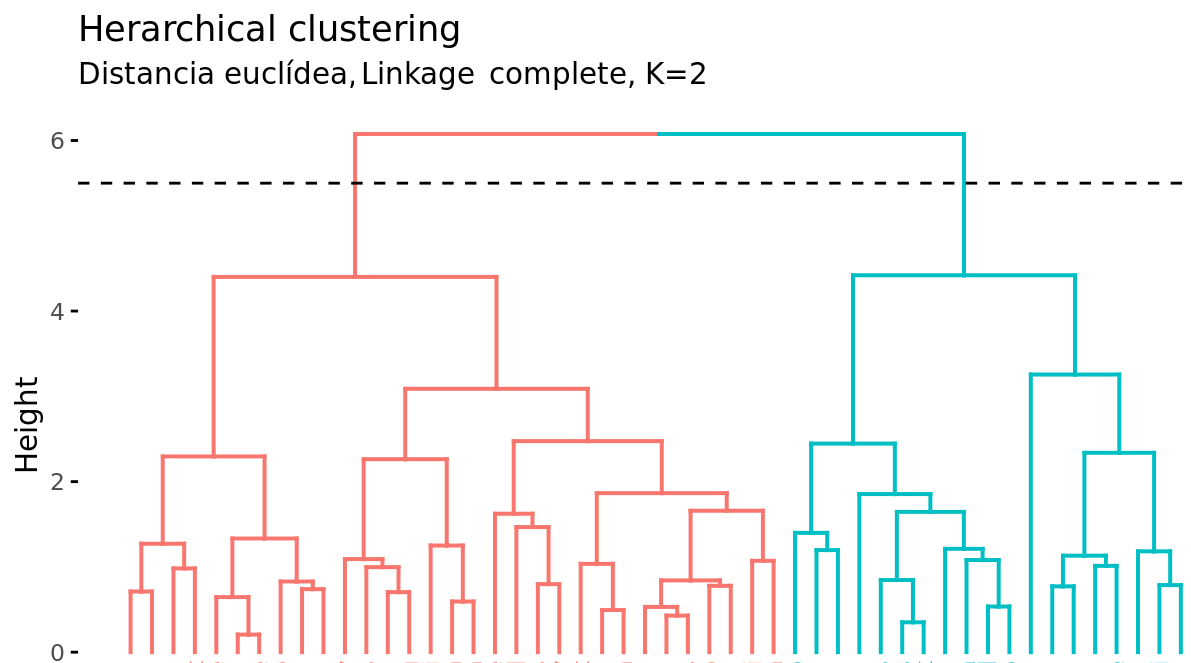

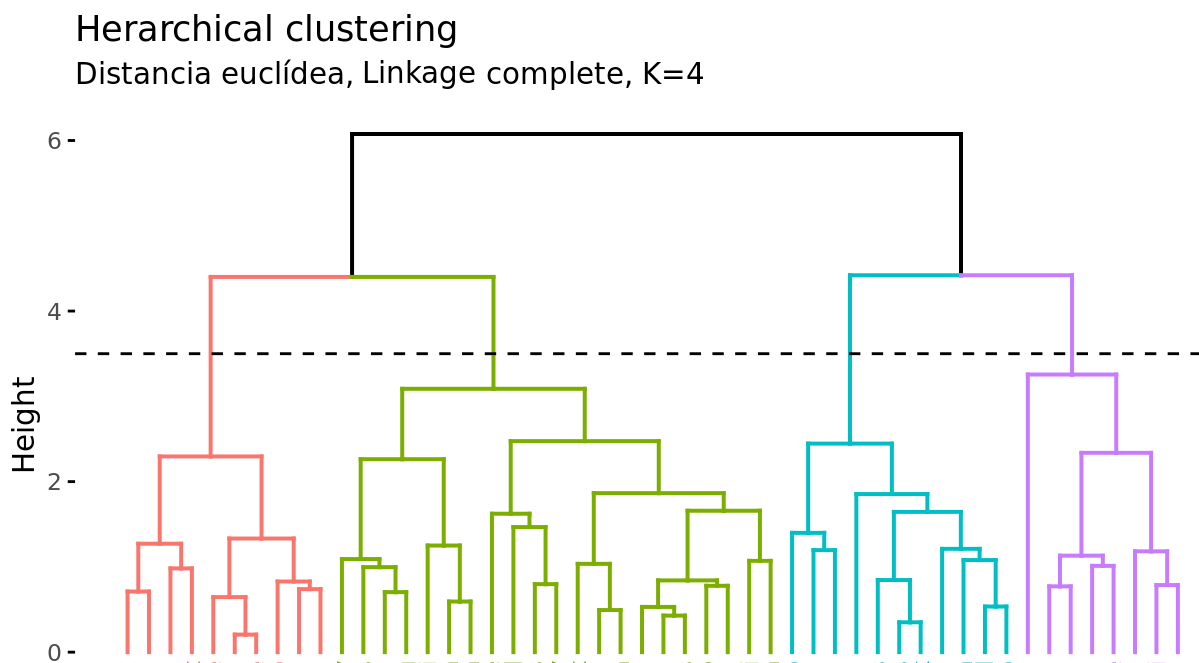

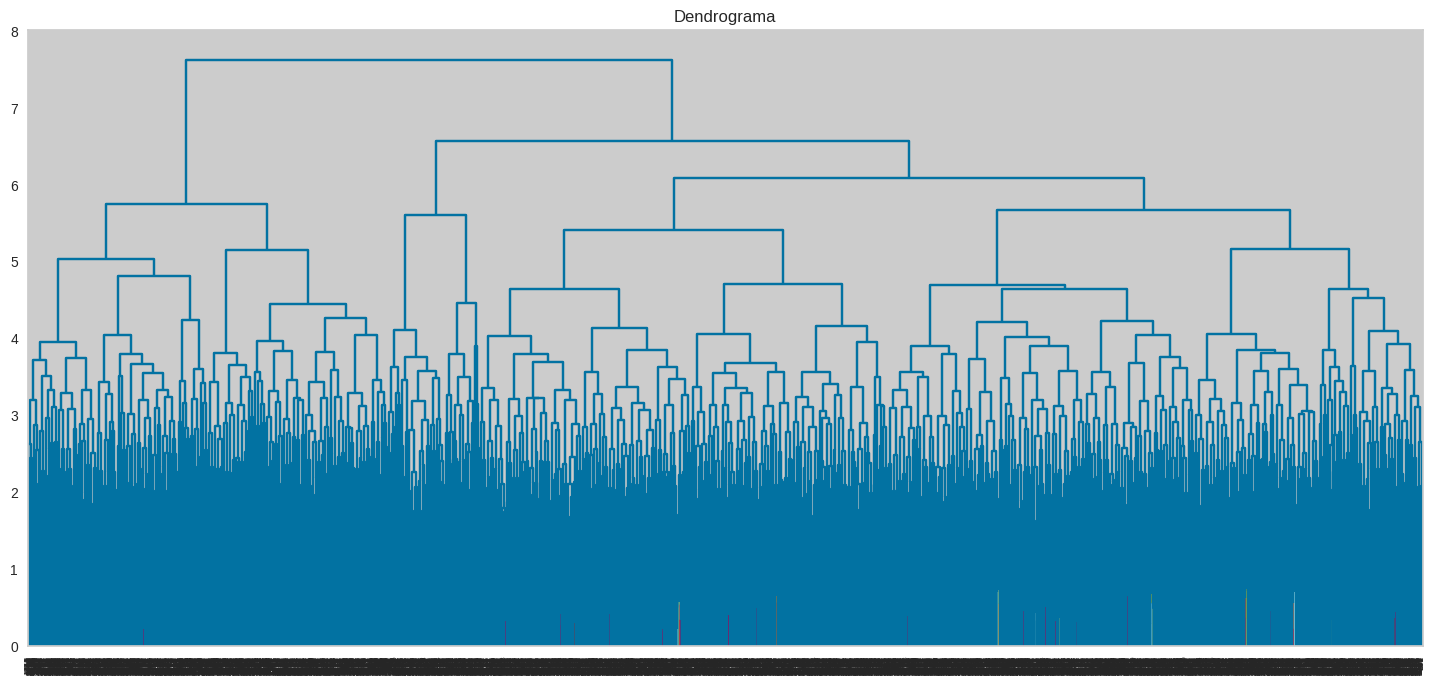

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
altura_corte = 0.8
Z = linkage(datos_clustering, method = 'complete', metric='euclidean' )
fig = plt.figure(figsize=(18, 8))
dn = dendrogram(Z,leaf_rotation=90,leaf_font_size=6,color_threshold =  altura_corte)
plt.title("Dendrograma")
plt.show()

### **Método silhouette para identificar el número óptimo de clusters**
El método silhouette es una técnica para evaluar la calidad de un agrupamiento y para decidir el número óptimo de clústeres en un análisis de datos. Este método mide qué tan bien se ajusta cada punto a su propio clúster en comparación con otros clústeres, lo que permite juzgar si los clústeres creados son compactos y bien separados.

**¿Cómo Funciona el Método Silhouette?**

Para cada punto en el conjunto de datos, el método silhouette calcula dos cosas principales:

* **Cohesión (Similitud Interna):** Evalúa qué tan cerca está el punto de los demás puntos dentro de su mismo clúster. Un valor alto de cohesión indica que el punto está bien agrupado con los otros puntos en su clúster.

* **Separación (Similitud Externa):** Mide la distancia del punto a los puntos en el clúster más cercano, pero distinto al suyo. Si un punto está más cerca de un clúster diferente al suyo, eso indica que podría estar mal agrupado.

**Valor del Coeficiente de Silhouette**

El coeficiente de silhouette para cada punto es un valor entre -1 y 1:

* **Cercano a 1:** Significa que el punto está bien agrupado dentro de su clúster y lejos de los otros clústeres.
* **Cercano a 0:** Indica que el punto se encuentra en la frontera entre dos clústeres y no está claramente agrupado.
* **Cercano a -1:** Sugiere que el punto está más cerca de un clúster diferente, lo que implica que está mal asignado.

Al calcular el valor promedio del coeficiente de silhouette para todos los puntos en el conjunto de datos, se obtiene una medida de qué tan bien se han agrupado los datos para un número dado de clústeres.

**Usando el Método Silhouette para Elegir el Número de Clústeres**

El método silhouette se utiliza comúnmente en el análisis de agrupamiento para seleccionar el número óptimo de clústeres. Al evaluar el valor promedio del coeficiente de silhouette para diferentes números de clústeres (por ejemplo, 2, 3, 4, etc.), se puede identificar el número de clústeres que maximiza este valor promedio. Este número es generalmente el que proporciona la mejor estructura de agrupamiento para los datos, con clústeres bien definidos y separados.

Text(0, 0.5, 'Media índices silhouette')

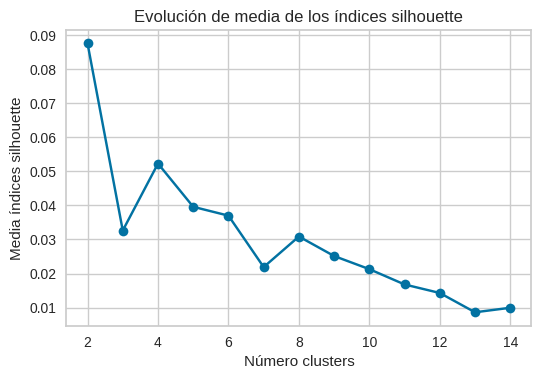

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric='euclidean',
                    linkage='complete',
                    n_clusters=n_clusters
             )

    cluster_labels = modelo.fit_predict(datos_clustering)
    silhouette_avg = silhouette_score(datos_clustering, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

El código utiliza **clustering jerárquico aglomerativo** para agrupar datos en 4 clusters. Este método comienza considerando cada punto como un cluster individual y luego los combina progresivamente según un criterio de similitud.


In [ ]:
agglom = AgglomerativeClustering(n_clusters =4, linkage = 'complete')
agglom.fit(datos_clustering)
agglom.labels_

array([1, 1, 2, ..., 1, 1, 3])

El código agrega una nueva columna llamada `cluster_` al DataFrame `datos_jerarquico`, que contiene las etiquetas de los clusters asignadas por el modelo de clustering jerárquico.


In [ ]:
datos_jerarquico = datos.copy()
datos_jerarquico['cluster_'] = agglom.labels_
datos_jerarquico.head()

,ID_Empleado,Competencias_Actuales,Rol_Laboral,Puntuacion_Desempeno,Horas_Capacitacion_Ultimo_Ano,Antiguedad_Empresa,Habilidades_Requeridas,Objetivos_Futuros,cluster_
0,1,Intermedio,Gerente,72.487795,65,6,Comunicación,Habilidades Transversales,0
1,2,Avanzado,Gerente,72.919142,43,3,Liderazgo,Dominio de Ventas,0
2,3,Intermedio,Analista,63.344441,3,19,Trabajo en Equipo,Rol de Liderazgo,2
3,4,Intermedio,Representante de Ventas,65.335701,63,8,Trabajo en Equipo,Habilidades Transversales,0
4,5,Intermedio,Desarrollador,64.469086,4,2,Resolución de Problemas,Habilidades Transversales,1


In [ ]:
datos_jerarquico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID_Empleado                    5000 non-null   int64  
 1   Competencias_Actuales          5000 non-null   object 
 2   Rol_Laboral                    5000 non-null   object 
 3   Puntuacion_Desempeno           5000 non-null   float64
 4   Horas_Capacitacion_Ultimo_Ano  5000 non-null   int64  
 5   Antiguedad_Empresa             5000 non-null   int64  
 6   Habilidades_Requeridas         5000 non-null   object 
 7   Objetivos_Futuros              5000 non-null   object 
 8   cluster_                       5000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 351.7+ KB


### **Visualización de Resultados**

Text(0, 0.5, 'mpg')

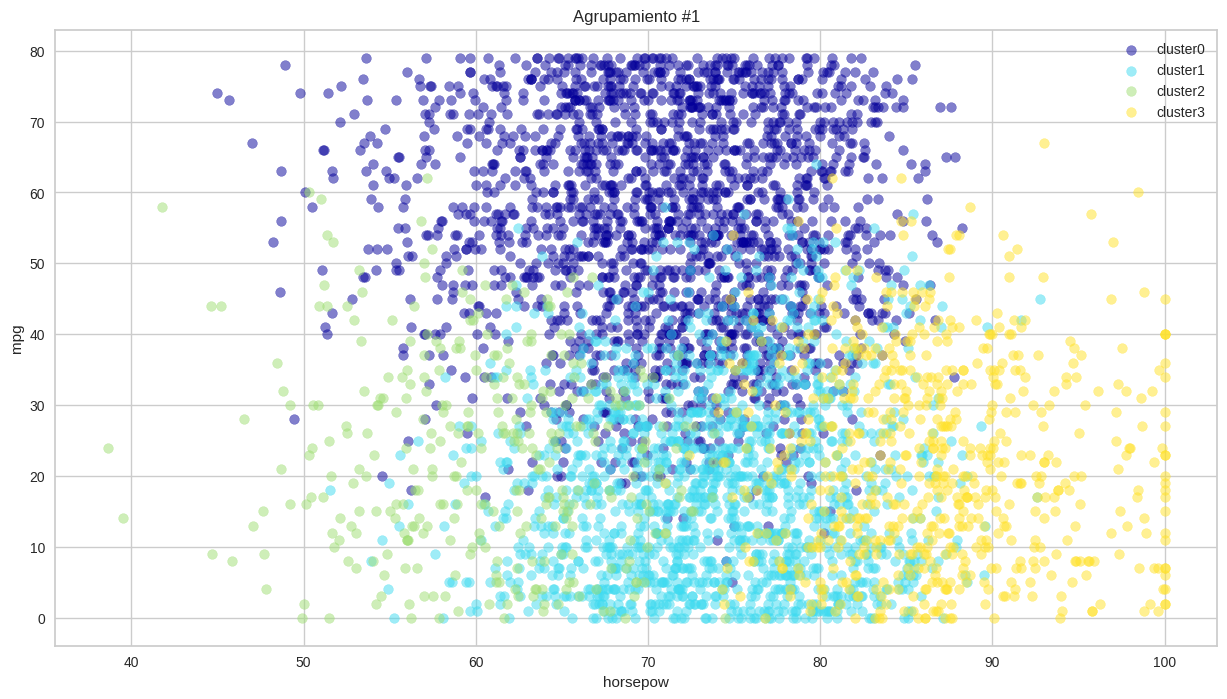

In [ ]:
import matplotlib.cm as cm

n_clusters = max(agglom.labels_)+1

colors=['#04009A','#3EDBF0','#9EDE73','#FFE227']

cluster_labels = list(range(0, n_clusters))


plt.figure(figsize=(15,8))

for color, label in zip(colors, cluster_labels):
    subset = datos_jerarquico[datos_jerarquico.cluster_ == label]
#    for i in subset.index:
#        plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.Puntuacion_Desempeno, subset.Horas_Capacitacion_Ultimo_Ano, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Agrupamiento')
plt.xlabel('Puntuacion_Desempeno')
plt.ylabel('Horas_Capacitacion_Ultimo_Ano')